In [12]:
from reportlab.lib.pagesizes import LETTER
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.enums import TA_CENTER, TA_JUSTIFY
from reportlab.lib.units import inch
import requests
import os
from PIL import Image as PILImage
from io import BytesIO
import json
from datetime import datetime
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from PIL import Image as PILImage
from io import BytesIO
import os
api_key = os.getenv("OPENAI_API_KEY")



In [13]:

# Prompt the user for school information
school_name = input("Enter the school name: ")
position_name = input("Enter the position name: ")
notes_file = input("Enter the name of the file containing your notes on the school: ")
location = input("Enter the location of the school: ")
#date = input("Enter the start date of this position (Example: June 2026. May 2027.):  ")
#consultant_name = input("Enter the name of the consultant in charge of this search: ")
#consultant_email = input("Enter the email of the consultant in charge of this search: ")

#school_name = "Catholic Memorial High School"
#position_name = "Athletic Director"
#notes_file = "CM_notes.pdf"
#location = "West Roxbury, MA"
date = "July 2026"
consultant_name = "Jim Shwartz"
consultant_email = "jim.shwartz@carneysandoe.com"

print(f"\nYou entered:")
print(f"School: {school_name}")
print(f"Position: {position_name}")
print(f"Notes file: {notes_file}")




You entered:
School: Catholic Memorial High School
Position: Principal
Notes file: CM_notes.pdf


In [14]:
# Read the contents of the notes file
try:
    with open(notes_file, 'r') as file:
        notes_content = file.read()
    print(f"\nSuccessfully read notes from {notes_file}")
    print(f"Notes preview: {notes_content[:100]}..." if len(notes_content) > 100 else f"Notes: {notes_content}")
except FileNotFoundError:
    print(f"\nError: The file '{notes_file}' was not found.")
    notes_content = ""
except Exception as e:
    print(f"\nError reading the file: {str(e)}")
    notes_content = ""

try:
    # Install PyPDF2 if not already installed
    import subprocess
    subprocess.check_call(['pip', 'install', 'PyPDF2'])
    import PyPDF2

    # Check if the file is a PDF
    if notes_file.lower().endswith('.pdf'):
        try:
            # Open the PDF file
            with open(notes_file, 'rb') as file:
                # Create a PDF reader object
                pdf_reader = PyPDF2.PdfReader(file)
                
                # Extract text from all pages
                notes_content = ""
                for page in pdf_reader.pages:
                    notes_content += page.extract_text()
                    
            print(f"\nSuccessfully read PDF notes from {notes_file}")
            print(f"Notes preview: {notes_content[:100]}..." if len(notes_content) > 100 else f"Notes: {notes_content}")
        except Exception as e:
            print(f"\nError reading the PDF file: {str(e)}")
            notes_content = ""
except Exception as e:
    print(f"\nError installing or importing PyPDF2: {str(e)}")
    notes_content = ""



Error reading the file: 'utf-8' codec can't decode byte 0xd3 in position 10: invalid continuation byte

Successfully read PDF notes from CM_notes.pdf
Notes preview: Site Visit Not es - Catholic Memor ialT o p i c
A r e a s
/  
F o c u s
G r o u p
sFaculty &
StaffMi...


In [15]:
import openai
api_key = os.environ.get("OPENAI_API_KEY")
client = openai.OpenAI(api_key=api_key)

In [16]:

response = client.chat.completions.create(
        model="gpt-4.1-nano",
            messages=[
                    {"role": "system", "content": f"You are an experienced HR professional. You are creating a 'Position Description.' This document will be displayed to people that apply for the position '{position_name}' at '{school_name}'. Please pull from the internet to create this overview. Additionally, here are some notes on the school, taken directly from a phone call or personal visit with school administrators: {notes_content} "},
                    {"role": "user", "content": f"Please create the 'overview' section of a Position Description for the {position_name} position at {school_name} in {location}. This overview section should be about 100 words in length. It is the first section of the longer 'Position Description' document, which will be displayed to all future applicants to this job. \
                    Here is an example of what the overview section of a Position Description looked like for 'The Thacher School': 'Founded in 1889 by Sherman Day Thacher, \
                    The Thacher School serves academically talented students from 24 states and nine countries in a rigorous college preparatory experience. Fifty-five percent of students identify as people of color. The faculty and students live and work closely together on a \
                    427-acre campus nestled in the foothills of the Los Padres National Forest in Ojai, California (85-miles north of Los Angeles). Honor, fairness, kindness, and truth are the cornerstones of school life. Together, school community commits to the belief that demands in the academic classroom, when combined with those of mountains and horses, of sports and the arts, produce independent minds, strong bodies, and powerful character. The School \
                    enrolls 260 students, has an operating budget of $29 million, and an endowment of $180 million.'"}
            ],
            max_tokens=1500
)
print(f"Total tokens: {response.usage.total_tokens}")

overview = response.choices[0].message.content


Total tokens: 1868


In [17]:
#responsibilities
response = client.chat.completions.create(
        model="gpt-4.1-nano",
            messages=[
                    {"role": "system", "content": f"You are an experienced HR professional. You are creating a 'Position Description.' This document will be displayed to people that apply for the position '{position_name}' at '{school_name}'. Please pull from the internet to create this overview. Additionally, here are some notes on the school, taken directly from a phone call or personal visit with school administrators: {notes_content} "},
                    {"role": "user", "content": f"Please create the 'responsibilities' section of a Position Description for the {position_name} position at {school_name}. This responsibilities section should be about 200 words in length. It is the second section of the longer 'Position Description' document, which will be displayed to all future applicants to this job. Do not say 'Responsibilities:' at the start. Simply output the text. Make sure to break your response up into bullet points. Each bullet point should be about 50 words. 55 maximum. Absolutely no longer than 55 words. Do not output your response with a '-' first. no hyphen. just state the content of the bullet point. \
                    Here is an example of what the overview section of a Position Description looked like for 'The Thacher School': 'Key Responsibilities: \
Reunion Giving Leadership \
● Lead the Reunion Giving program, including campaign strategy, goal setting, timelines, and \
reporting. \
● Identify, cultivate, and solicit lead donors from each reunion class. \
● Recruit and support volunteer class agents to drive participation and enthusiasm. \
● Collaborate with the Alumni Relations team on comprehensive reunion strategy and \
programming. \
Team Collaboration \
● Serve as mentor and thought partner to the Associate Director of Alumni Giving. \
● Work closely with the Annual Giving team to align on participation campaigns and overall \
fundraising goals. \
● Partner with Alumni Relations on class rep engagement and 50th reunion planning. \
● Coordinate with major gifts officers on shared donor strategy and stewardship. \
Portfolio Fundraising \
● Manage a personal portfolio of 100–125 alumni and reunion prospects. \
● Conduct 120+ donor meetings annually with an emphasis on cultivation, solicitation, and \
stewardship. \
● Draft proposals, contact reports, and personalized donor communications in partnership with \
the Director of Institutional Advancement. \
● Set and track clear goals with defined timelines and measurable outcomes.'"}
            ],
            max_tokens=1500
)

responsibilities = response.choices[0].message.content
print(responsibilities)

Lead the strategic vision and overall administration of Catholic Memorial High School, ensuring alignment with the school's mission, Catholic values, and community priorities. Foster a culture of academic excellence, faith, and caring that supports the holistic development of students, faculty, and staff.

Oversee the development, implementation, and evaluation of school policies, curricula, and educational programs to ensure quality and relevance. Collaborate with faculty to maintain high standards, support professional growth, and integrate faith-based and traditional values into the educational experience.

Provide dynamic leadership for faculty, staff, and students by promoting a positive, inclusive, and engaging school environment. Facilitate regular communication, teamwork, and shared decision-making to strengthen community bonds and ensure the school operates efficiently.

Manage school finances, budgets, resource allocation, and fundraising efforts to sustain long-term financia

In [18]:
#qualifications
response = client.chat.completions.create(
        model="gpt-4.1-nano",
            messages=[
                    {"role": "system", "content": f"You are an experienced HR professional. You are creating a 'Position Description.' This document will be displayed to people that apply for the position '{position_name}' at '{school_name}'. Please pull from the internet to create this. Additionally, here are some notes on the school, taken directly from a phone call or personal visit with school administrators: {notes_content} "},
                    {"role": "user", "content": f"Please create the 'qualifications' section of a Position Description for the {position_name} position at {school_name}. This qualifications section should be between 75-110 words in length. It is the third section of the longer 'Position Description' document, which will be displayed to all future applicants to this job. Make sure to break your response up into bullet points. Use the '-' symbol to create bullet points. Each bullet point should be about 30 words long. No longer than 40 maximum. Do not say 'Qualifications:' at the start. \
                    Here is an example of what the qualifications section of a Position Description looked like for 'The Thacher School': ● A deep belief in—and ability to articulate—the mission and values of The Thacher School,including a demonstrated commitment to equity, inclusion, and belonging.● Proven track record of cultivating relationships and securing philanthropic support.● Outstanding communication skills—oral, written, and interpersonal.\
● Bachelor's degree preferred. \
● Experience managing projects and priorities in a fast-paced, collaborative environment.\
● Cultural fluency and a respectful, inclusive approach to engaging a wide range of constituents.\
● Comfort and skill in holding space for complex and nuanced conversations.\
● Familiarity with Raisers Edge or a comparable CRM system.\
● High standards of discretion, accountability, and integrity.\
● Availability and enthusiasm for travel.'"}
            ],
            max_tokens=1500
)
print(f"Total tokens: {response.usage.total_tokens}")

qualifications = response.choices[0].message.content

Total tokens: 1949


In [19]:
#salary 
response = client.chat.completions.create(
        model="gpt-4.1-nano",
            messages=[
                    {"role": "system", "content": f"You are an experienced HR professional. You are creating a 'Position Description.' This document will be displayed to people that apply for the position '{position_name}' at '{school_name}'. Here are some notes on the school, taken directly from a phone call or personal visit with school administrators. If there is an exact salary specified, that's most important. If there is conflicting salary expectations online, ignore that information and use the salary specified in the notes. Here are the notes: {notes_content} "},
                    {"role": "user", "content": f"Please create the 'salary' section of a Position Description for the {position_name} position at {school_name}. This salary section should be about 50 words in length. It is the fourth section of the longer 'Position Description' document, which will be displayed to all future applicants to this job. \
                    Here is an example of what the salary section of a Position Description looked like for 'The Thacher School': 'Salary Range is $105,000-$125,000. Final salary \
is based on experience relevant to the role and \
internal equity. The Alumni and Development \
Offices offers a hybrid, flexible work \
environment. Thacher offers a competitive total \
rewards package, which includes a 403(b) match, \
healthcare coverage, and a broad range of other \
benefits including full tuition remission for \
eligible dependents, use of campus facilities and \
generous professional development support. \
Housing is not included in this role'"}
                    ],
            max_tokens=1500
)
print(f"Total tokens: {response.usage.total_tokens}")

salary = response.choices[0].message.content

print(salary)

Total tokens: 1753
The salary for the Principal position at Catholic Memorial High School is $150,000 annually. Final compensation will be based on experience, leadership qualities, and alignment with the school's mission. The school offers a comprehensive benefits package, including health insurance, retirement options, and professional development opportunities. Housing is not included.


In [20]:

#response = client.chat.completions.create(
 #       model="gpt-4.1-nano",
 #           messages=[
 #                   {"role": "system", "content": ""},
 #                   {"role": "user", "content": f"output the location of {school_name}. Here are additional notes on the school to help you find it's location: {notes_content}. It should be in this style: 'Hebron, ME'. here's another example: 'Houston, TX'. Do not output 'school is located in location'. I just want you to output the Town followed by the state. no other words should be in your output. Output in this format: 'Town, State'. "}
 ##                   ],
 #           max_tokens=1500
#)
#location = response.choices[0].message.content
#print(location)

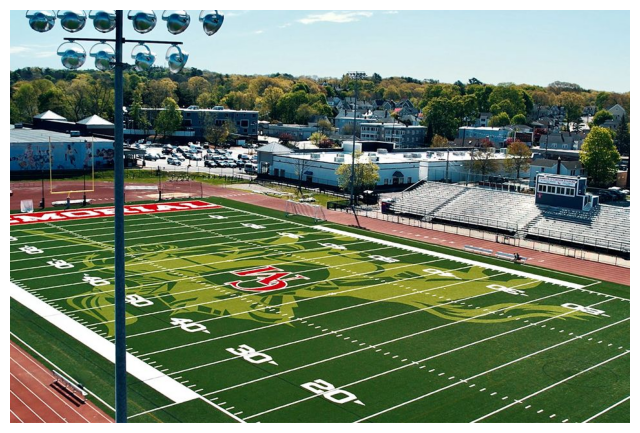

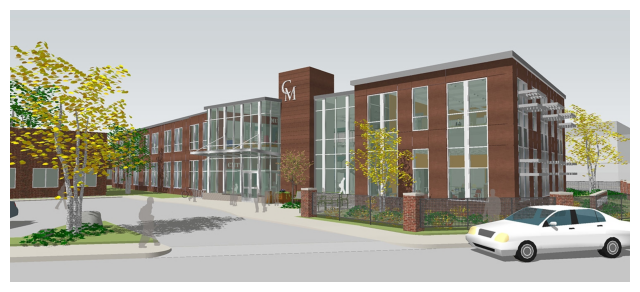

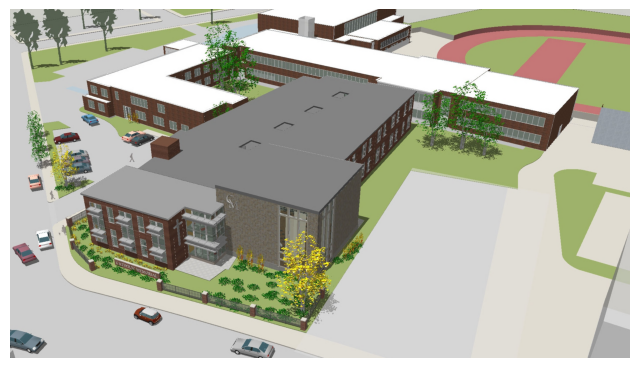

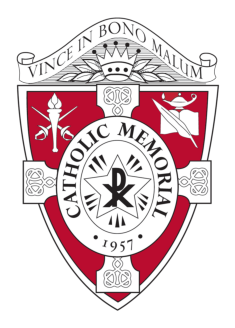

In [21]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import os

def search_images(query, min_width=800, min_height=600, max_images=3):
    search_url = "https://www.googleapis.com/customsearch/v1"
    params = {
        'key': os.getenv("GOOGLE_API_KEY"),  
        'cx': os.getenv("GOOGLE_SEARCH_ENGINE_ID"),  
        'q': query,
        'searchType': 'image',
        'num': 10
    }

    response = requests.get(search_url, params=params)
    if response.status_code != 200 or 'items' not in response.json():
        print(f"No results for query: {query}")
        return []

    items = response.json()['items']
    seen_urls = set()
    images = []
    headers = {'User-Agent': 'Mozilla/5.0'}

    for item in items:
        image_url = item.get('link')
        if not image_url or image_url in seen_urls:
            continue

        try:
            img_response = requests.get(image_url, headers=headers, timeout=5)
            if 'image' not in img_response.headers.get('Content-Type', ''):
                continue

            img = Image.open(BytesIO(img_response.content))
            width, height = img.size

            if width >= min_width and height >= min_height:
                seen_urls.add(image_url)
                images.append(img)
                if len(images) >= max_images:
                    break
        except Exception:
            continue

    return images

def search_logo(query):
    search_url = "https://www.googleapis.com/customsearch/v1"
    params = {
        'key': os.getenv("GOOGLE_API_KEY"),
        'cx': os.getenv("GOOGLE_SEARCH_ENGINE_ID"),
        'q': query,
        'searchType': 'image',
        'num': 5
    }

    response = requests.get(search_url, params=params)
    if response.status_code != 200 or 'items' not in response.json():
        print("No logo found")
        return None

    headers = {'User-Agent': 'Mozilla/5.0'}
    for item in response.json()['items']:
        image_url = item.get('link')
        if not image_url:
            continue
        try:
            img_response = requests.get(image_url, headers=headers, timeout=5)
            if 'image' in img_response.headers.get('Content-Type', ''):
                return Image.open(BytesIO(img_response.content))
        except Exception:
            continue
    return None

# 1. Get and save 3 high-quality campus/building images
campus_query = f"{school_name} {location} campus building"
campus_images = search_images(campus_query)

for i, img in enumerate(campus_images):
    filename = f"school_campus_{i+1}.png"
    img.save(filename)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    plt.close()

if not campus_images:
    print("No suitable campus images found")

# 2. Get and save school logo
logo_query = f"{school_name} {location} logo emblem"
logo_img = search_logo(logo_query)
if logo_img:
    logo_img.save("school_logo.png")
    plt.figure(figsize=(4, 4))
    plt.imshow(logo_img)
    plt.axis('off')
    plt.show()
    plt.close()
else:
    print("No school logo found")



In [22]:
from reportlab.platypus import BaseDocTemplate, PageTemplate, Frame, Paragraph, Spacer, ListFlowable, ListItem, HRFlowable, Image, Table, TableStyle, PageBreak, FrameBreak
from reportlab.lib.pagesizes import letter
from reportlab.lib.units import inch
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.lib.enums import TA_CENTER
from reportlab.pdfgen import canvas
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from io import BytesIO
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase.pdfmetrics import registerFontFamily
import requests

# Register Minion Pro font
pdfmetrics.registerFont(TTFont('MinionPro', 'MinionPro-Regular.ttf'))
pdfmetrics.registerFont(TTFont('MinionPro-Bold', 'MinionPro-Bold.ttf'))
pdfmetrics.registerFont(TTFont('MinionPro-Italic', 'MinionPro-It.ttf'))

# Create the document with a custom page template
doc = BaseDocTemplate("position_description.pdf", pagesize=letter)
frame = Frame(
    doc.leftMargin,
    doc.bottomMargin + .9 * inch,
    doc.width,
    doc.height - .7 * inch,
    id='normal'
)

# Footer drawing function
def draw_footer(canvas, doc):
    footer_img_path = "footer.png"
    try:
        footer_height = 2.09 * inch
        y_position = 0.1 * inch
        line_y = y_position + footer_height - .3 * inch
        canvas.setStrokeColorRGB(0, 0, 0)
        canvas.setLineWidth(0.85)
        canvas.line(doc.leftMargin - 0.25 * inch, line_y, doc.pagesize[0] - doc.rightMargin + 0.25 * inch, line_y)
        x_position = (doc.pagesize[0] - (doc.width * 1.1)) / 2
        canvas.drawImage(
            footer_img_path,
            x=x_position,
            y=y_position,
            width=doc.width * 1.1,
            height=footer_height,
            preserveAspectRatio=True,
            mask='auto'
        )
    except Exception as e:
        print(f"Failed to load footer image: {e}")

def draw_header(canvas, doc):
    try:
        logo_height = 1.53 * inch
        logo_width = 3.06 * inch
        x_position = (doc.pagesize[0] - logo_width) / 2

        if canvas.getPageNumber() == 1:
            canvas.drawImage(
                "school_logo.png",
                x=x_position,
                y=doc.pagesize[1] - logo_height - 0.25 * inch,
                width=logo_width,
                height=logo_height,
                preserveAspectRatio=True
            )
    except Exception as e:
        print(f"Error in draw_header: {e}")

doc.addPageTemplates([
    PageTemplate(
        id='WithHeaderAndFooter',
        frames=[frame],
        onPage=lambda canvas, doc: (draw_header(canvas, doc), draw_footer(canvas, doc))
    )
])

# Styles
styles = getSampleStyleSheet()
title_style = ParagraphStyle(name="Title", fontSize=14, leading=12, alignment=TA_CENTER, spaceAfter=12, fontName="MinionPro-Bold")
subtitle_style = ParagraphStyle(name="Subtitle", fontSize=12, leading=15, alignment=TA_CENTER, spaceAfter=24, fontName="MinionPro")
header_style = ParagraphStyle(name="SectionHeader", fontSize=13, leading=16, spaceBefore=12, spaceAfter=6, fontName="MinionPro-Bold")
body_style = ParagraphStyle(name="Body", fontSize=11, leading=15.5, fontName="MinionPro")

# Story content
story = []
story.append(Spacer(1, 1 * inch))
story.append(Paragraph(f"{school_name} - {location}", title_style))
story.append(Paragraph(position_name, title_style))
story.append(Paragraph(date, title_style))
story.append(HRFlowable(width="100%", thickness=1, color="black", spaceBefore=6, spaceAfter=12))
story.append(Paragraph(overview, body_style))

# Responsibilities section with image next to first bullets
story.append(Paragraph("Major Functions and Responsibilities", header_style))

# Split responsibilities into first 2 bullets and rest
responsibilities_list = [item.strip("● ").strip() for item in responsibilities.strip().split("\n") if item.strip()]
first_two_bullets = responsibilities_list[:2]
remaining_bullets = responsibilities_list[2:]

# Create bullet points for first two items
bullets_above = [ListItem(Paragraph(item, body_style)) for item in first_two_bullets]
bullet_list_above = ListFlowable(bullets_above, bulletType='bullet', leftIndent=20)

img = Image("school_campus_1.png", width=3 * inch, height=3 * inch)  

# Create table with first two bullets and image
table_data = [[bullet_list_above, img]]
table = Table(table_data, colWidths=[doc.width - 3.1 * inch, 3 * inch])  # Adjusted column widths for larger image
table.setStyle(TableStyle([
    ('VALIGN', (0, 0), (-1, -1), 'TOP'),
    ('LEFTPADDING', (0, 0), (0, 0), 0),   # text column
    ('RIGHTPADDING', (0, 0), (0, 0), 12), # space between text and image
    ('LEFTPADDING', (1, 0), (1, 0), 12),  # space between image and text
    ('RIGHTPADDING', (1, 0), (1, 0), 0),  # image column
    ('TOPPADDING', (0, 0), (-1, -1), 0),
    ('BOTTOMPADDING', (0, 0), (-1, -1), 0),
]))

story.append(table)
story.append(Spacer(1, 0.5 * inch))  # Add half inch of space

# Add remaining bullets
bullets_below = [ListItem(Paragraph(item, body_style)) for item in remaining_bullets]
story.append(ListFlowable(bullets_below, bulletType='bullet', leftIndent=20))

story.append(Paragraph("Experience and Skills", header_style))
qualifications_list = qualifications.strip().split("-")
bullets = [ListItem(Paragraph(item.strip(), body_style)) for item in qualifications_list if item.strip()]
story.append(ListFlowable(bullets, bulletType='bullet', leftIndent=20))

story.append(Paragraph("Salary Range", header_style))
story.append(Paragraph(salary, body_style))

story.append(Paragraph("To Apply", header_style))
story.append(Paragraph("Interested and qualified candidates should submit, as separate PDF documents, the following materials:", body_style))

apply_list = [
    "A cover letter expressing interest in this particular position;",
    "A current resume with all dates included; and",
    "A list of five professional references with the name, relationship, phone number, and email address of each (references will not be contacted without the candidate's permission and not before a mutual interest has clearly been established)"
]
bullets = [ListItem(Paragraph(item, body_style)) for item in apply_list]
story.append(ListFlowable(bullets, bulletType='bullet', leftIndent=20))

contact_info = f"to {consultant_name} at {consultant_email}. Please do not contact the school directly."
story.append(Paragraph(contact_info, body_style))
# Define consistent image dimensions

from PIL import Image as PILImage

def crop_center_square(image_path):
    img = PILImage.open(image_path)
    width, height = img.size
    min_dim = min(width, height)

    left = (width - min_dim) // 2
    top = (height - min_dim) // 2
    right = left + min_dim
    bottom = top + min_dim

    cropped = img.crop((left, top, right, bottom))
    return cropped

# Crop and save to temp files
crop_center_square("school_campus_2.png").save("school_campus_2_cropped.png")
crop_center_square("school_campus_3.png").save("school_campus_3_cropped.png")

# Now load with consistent square dimensions
img_width = 3 * inch
img_height = 3 * inch
img1 = Image("school_campus_2_cropped.png", width=img_width, height=img_height)
img2 = Image("school_campus_3_cropped.png", width=img_width, height=img_height)


story.append(Spacer(1, 2 * inch))  # Increased spacer height to move images lower

# Calculate available width
page_width = doc.pagesize[0] - doc.leftMargin - doc.rightMargin
col_width = page_width / 2

image_table = Table([[img1, img2]], colWidths=[col_width, col_width])
image_table.setStyle(TableStyle([
    ('VALIGN', (0, 0), (-1, -1), 'TOP'),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('LEFTPADDING', (0, 0), (-1, -1), 0),
    ('RIGHTPADDING', (0, 0), (-1, -1), 0),
    ('TOPPADDING', (0, 0), (-1, -1), 0),
    ('BOTTOMPADDING', (0, 0), (-1, -1), 0),
]))

story.append(image_table)

doc.build(story)